# K-means clustering: using "sklearn" and sythetic data

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [3]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

In [48]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [95]:
# Dataset url
url = Ruta + "datasets/iris/iris.csv"

# Especifica los nombres de las columnas
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Carga el archivo CSV con los encabezados proporcionados
df = pd.read_csv(url, header=None, names=column_names)

# Establece el nombre de las filas como la primera columna
df.index = df.index + 1 # Suma 1 para comenzar desde 1 en lugar de 0
df.index.name = 'Observations'  # Nombre de la primera columna


# Understanding and preprocessing the data

1. Get a general 'feel' of the data


In [62]:
# Print the dataframe
df

,sepal_length,sepal_width,petal_length,petal_width,species
Observations,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [63]:
# get the number of observations and variables
df.shape


(150, 5)

2. Drop rows with any missing values


In [64]:
# Drop rows with NaN values if existing
df.dropna()

# Print the new shape
print(df.shape)

(150, 5)


3. Scatterplot




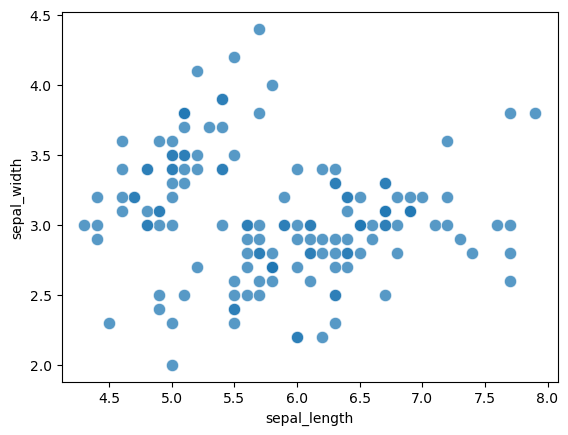

In [67]:
# Scatterplot of sepal_length y sepal_width
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", s=80, alpha=0.75)
plt.show()

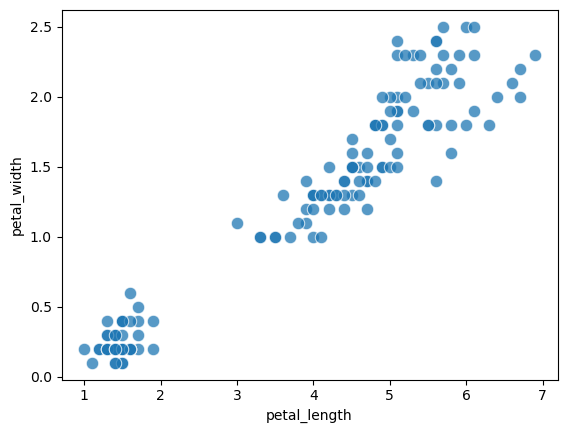

In [68]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df, x="petal_length", y="petal_width", s=80, alpha=0.75)
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

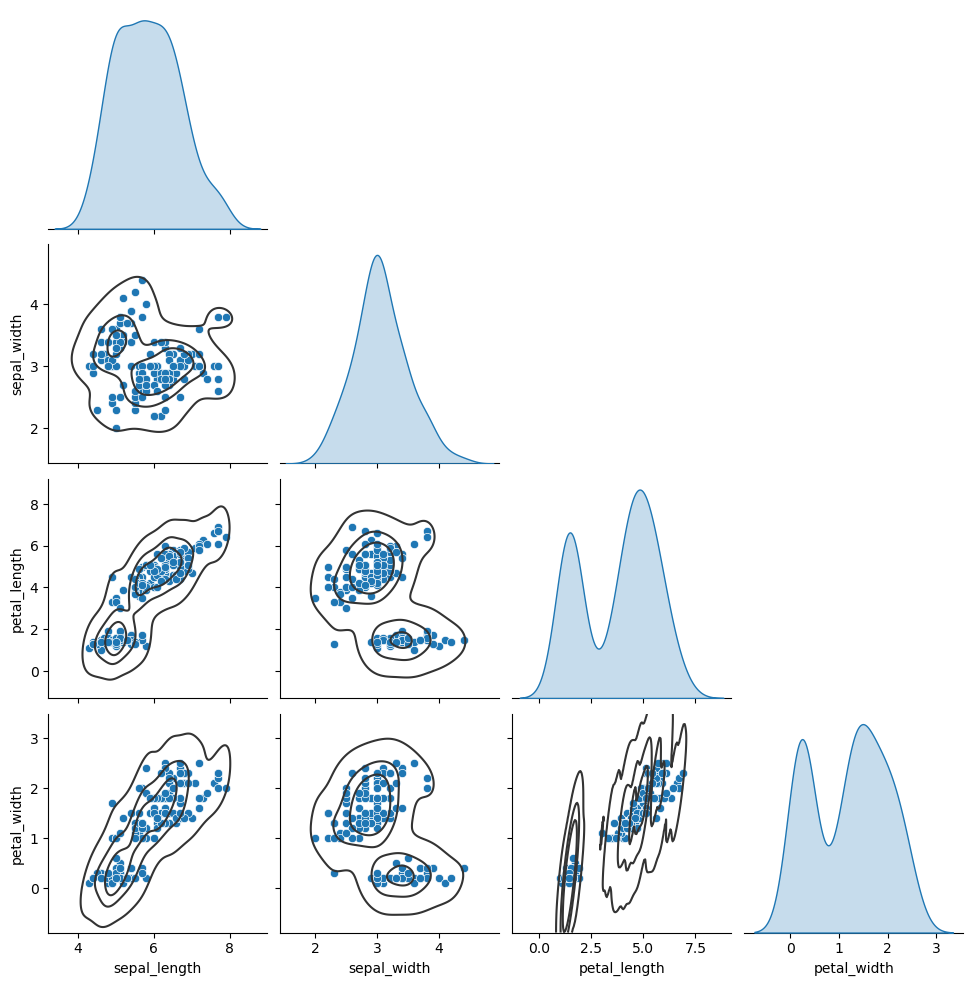

In [69]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [114]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

df_encoded = pd.get_dummies(df)

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
#yestimated = km.fit_predict(df_encoded)
yestimated = km.fit_predict(df_encoded[['sepal_length','sepal_width']] )
#yestimated = km.fit_predict(df_encoded[['petal_length','petal_width']] )

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [115]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df

,sepal_length,sepal_width,petal_length,petal_width,species,yestimated
Observations,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,1
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,1


In [116]:
# Print the Labels/Names of the existing clusters
df.yestimated.unique()

array([0, 1, 2])

In [117]:
# Cluster centroides
km.cluster_centers_


array([[5.00392157, 3.40980392],
       [6.82391304, 3.07826087],
       [5.8       , 2.7       ]])

In [118]:
# Sum of squared error (sse) of the final model
km.inertia_

37.08627024722933

In [119]:
# The number of iterations required to converge
km.n_iter_

7

# <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Compute the number of points in each cluster

In [120]:
# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 51
Number of points in clusters 1: 46
Number of points in clusters 02: 53
Total Number of points in the clusters: 150


# Plot estimated clusters

Plot estimated clusters

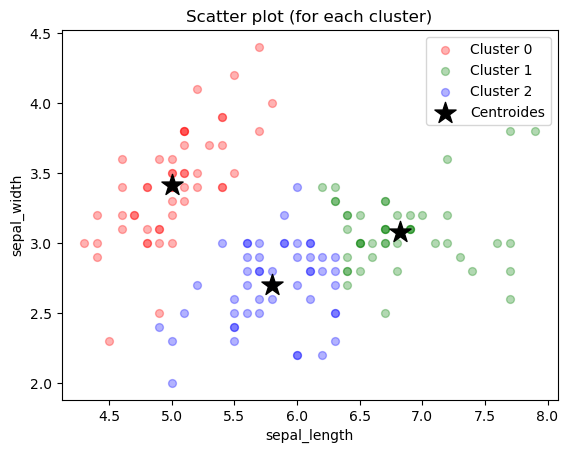

In [121]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.sepal_length, df1.sepal_width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.sepal_length, df2.sepal_width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.sepal_length, df3.sepal_width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [85]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['sepal_length','sepal_width']])
    # Save sse for each k
    sse.append(km.inertia_)


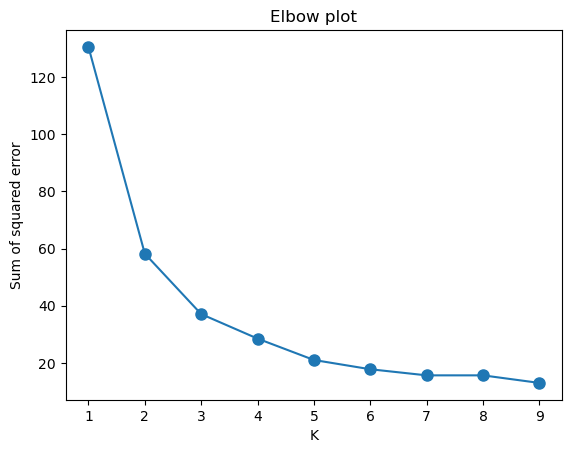

In [86]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

Al realizar esta primera actividad como un bosquejo rápido del funcionamiento del algoritmo K-means, he podido apreciar la utilidad y la versatilidad de esta técnica en la agrupación de datos. Una de las observaciones más interesantes que surgieron fue cómo el algoritmo pudo identificar patrones subyacentes en nuestro conjunto de datos utilizando diferentes variables. Esto subraya la importancia de elegir cuidadosamente las variables adecuadas y comprender su correlación antes de aplicar técnicas de clustering como K-means.

Además, la capacidad de K-means para asignar de forma automática los puntos de datos a los clusters y su relativa simplicidad de implementación hacen que sea una herramienta valiosa para explorar la estructura de los datos y descubrir posibles agrupaciones.

Sin embargo, también es importante destacar que los resultados de K-means pueden variar según los parámetros seleccionados, como el número de clusters (K) o el método de inicialización. Por lo tanto, es crucial realizar un análisis cuidadoso y experimentar con diferentes configuraciones para obtener resultados significativos y útis.



# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


- Al realizar el clustering con el conjunto de datos de flores iris utilizando diferentes conjuntos de características, se puede evaluar la calidad de agrupamiento mediante la comparación de los resultados obtenidos. Para determinar cuál de los enfoques proporciona una agrupación mejor, se pueden calcular métricas de rendimiento como la pureza, la puntuación de silueta y el índice Davies-Bouldin.

- Clustering con las cuatro características:
En este enfoque, se utilizan todas las cuatro características disponibles en el conjunto de datos: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Esto proporciona una representación completa de las características de las flores iris. Cabe recalcar que el clustering se hace con las 4 variables, pero al momento de hacer las gráficas, es necesario hacerlo entre 2 variables.

- Clustering con las dos medidas del pétalo:
En este enfoque, se utilizan solo las medidas del pétalo (longitud y ancho). Esto puede llevar a una agrupación más enfocada en las características específicas del pétalo, lo que podría resultar en agrupaciones más distintas y homogéneas.


 - Clustering con las dos medidas del sépalo:
Aquí, se utilizan solo las medidas del sépalo (longitud y ancho), excluyendo las características del pétalo. Esto puede resultar en agrupaciones que se centran más en las características del sépalo, lo que podría ser útil si estas características son las más relevantes para la diferenciación de las especies de iris.

